In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [9]:


!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:09<00:00, 158MB/s]
100% 1.06G/1.06G [00:09<00:00, 124MB/s]


In [10]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [12]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [14]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 82s 107ms/step - loss: 1.2302 - accuracy: 0.5741 - val_loss: 0.6574 - val_accuracy: 0.6378
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.6602 - accuracy: 0.6000 - val_loss: 0.5893 - val_accuracy: 0.6536
Epoch 3/10
625/625 [==============================] - 69s 109ms/step - loss: 0.5763 - accuracy: 0.6736 - val_loss: 0.7222 - val_accuracy: 0.6680
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4835 - accuracy: 0.7441 - val_loss: 0.8083 - val_accuracy: 0.6520
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4349 - accuracy: 0.7826 - val_loss: 0.4687 - val_accuracy: 0.7612
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3762 - accuracy: 0.8124 - val_loss: 0.4771 - val_accuracy: 0.7874
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3312 - accuracy: 0.8418 - val_loss: 0.5020 - val_ac

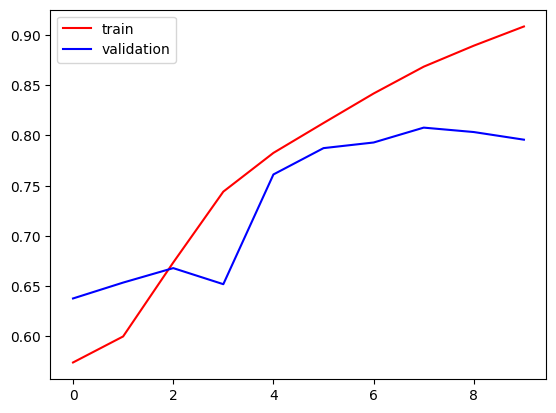

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

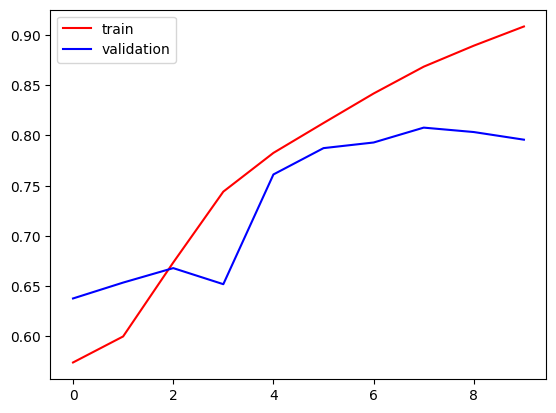

In [19]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

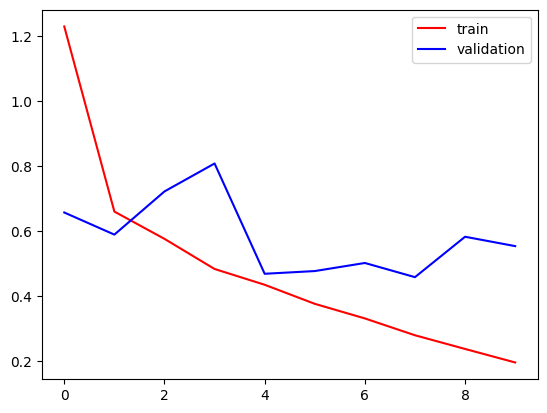

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

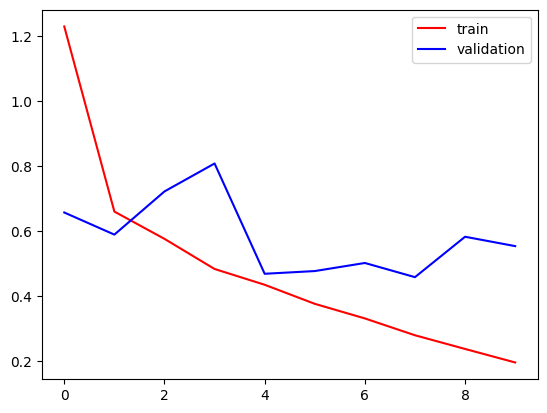

In [23]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [24]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout   # done this now
# Batch Norm # done this now
# Reduce complexity

In [74]:
import cv2

In [93]:
test_img = cv2.imread('/content/cat.86.jpg')

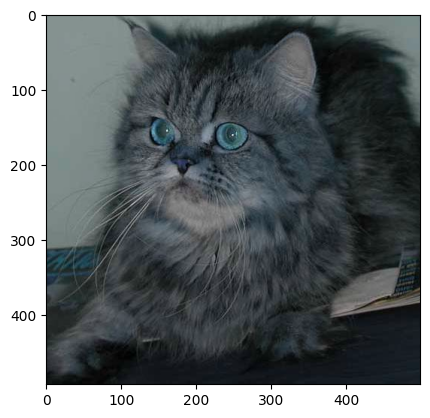

In [94]:
plt.imshow(test_img)

In [95]:
test_img.shape

(493, 499, 3)

In [96]:
test_img=cv2.resize(test_img,(256,256))

In [97]:
test_input=test_img.reshape((1,256,256,3))

In [98]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)